# Simulation Project

## Libraries

In [119]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

## Arrival function type one(Saw renter)

In [120]:
def arrival_type_1():
    global FEL, current_time, customers_1, customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, waiting_customer, Betty_customer, component_1, component_2
    customers_1 += 1
    between_arrival_time_1 = np.random.uniform(0,60)
    if (current_time + between_arrival_time_1) < 600:
        FEL.append((current_time + between_arrival_time_1, 'a1'))
        FEL.sort()
    if LB == 0:
        LB = 1
        Betty_customer += 1
        renting_time_Betty = np.random.uniform(component_1,component_2)
        FEL.append((current_time + renting_time_Betty, 'rb1'))
        FEL.sort()
    elif LB == 1:
        LQ += 1
        waiting_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        LQ_type.append('a1')
        start_time.append(current_time)
        

## Arrival function type two (Saw restorer)

In [121]:
def arrival_type_2():
    global FEL, current_time,customers_1, customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, waiting_customer, Betty_customer
    customers_2 += 1
    between_arrival_time_2 = np.random.uniform(0,60)
    if (current_time + between_arrival_time_2) < 600:
        FEL.append((current_time + between_arrival_time_2, 'a2'))
        FEL.sort()
    if LB == 0:
        LB = 1
        Betty_customer += 1
        FEL.append((current_time + 2, 'rb2'))
        FEL.sort()
    elif LB == 1:
        LQ += 1
        waiting_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        LQ_type.append('a2')

## Completion of type 1 service by Betty

In [122]:
def comp_rent_Betty():
    global FEL, current_time, customers_1,customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, Betty_customer, component_1, component_2
    if current_time<600:
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(component_1,component_2)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = 0 
    elif (current_time >= 600 and current_time < 660):
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(component_1,component_2)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = -1
            maintenance_time_Betty = np.random.uniform(2,10)
            clean_time_Betty = np.random.uniform(4,16)
            FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))

## Completion of type 2 service by Betty

In [123]:
def comp_restore_Betty():
    global FEL, current_time, customers_1,customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, Betty_customer
    if current_time<600:
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(component_1,component_2)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = 0 
    elif (current_time >= 600 and current_time < 660):
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(component_1,component_2)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = -1
            maintenance_time_Betty = np.random.uniform(2,10)
            clean_time_Betty = np.random.uniform(4,16)
            FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))
            FEL.sort()

## Completion of cleaning saw by Betty

In [124]:
def cleaning_Betty():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type
    maintenance_time_Betty = np.random.uniform(2,10)
    clean_time_Betty = np.random.uniform(4,16)
    FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))
    FEL.sort()

## Completion of type 1 service by David

In [125]:
def comp_rent_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()

## Completion of type 2 service by David

In [126]:
def comp_restore_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()

## Completion of cleaning saw by David

In [127]:
def cleaning_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()

## Heart of Simulation

In [128]:
component_1 = 0
component_2 = 0
time_list = np.arange(1,31)
customer_1_SA = []
customer_2_SA = []
p_waiting_SA = []
average_LQ_SA = []
Betty_customer_SA = []
David_customer_SA = []
avg_delay_time_SA = []
for i in range(len(time_list)-10):
    component_1 = time_list[i]
    component_2 = time_list[i+10] 
    customers_1_list = []
    customers_2_list = []
    avg_delay_time_list = []
    average_LQ_list = []
    p_waiting_list = []
    Betty_customer_list = []
    David_customer_list = []
    iter = 20
    for j in range(iter):
        simulation_time = 660
        FEL = []
        current_time = 0
        customers_1 = 0
        customers_2 = 0
        start_time = []
        finish_time = []
        delay_time = []
        queue_history = []
        time_history = []
        David_customer = 0
        Betty_customer = 0
        waiting_customer = 0
        LB = 0
        LD = -1
        LQ = 0
        LQ_type = []
        random_num = np.random.random()
        if random_num < 0.5:
            FEL.append((0,'a1'))
            FEL.append((1,'a2'))
        else:
            FEL.append((0,'a2'))
            FEL.append((1,'a1'))
        queue_history.append(0)
        time_history.append(0)
        FEL.append((0,'sd'))
        while (current_time < simulation_time):
            current_time,event_type = FEL.pop(0)
            if event_type=='a1':    
                arrival_type_1()
            elif event_type=='a2':
                arrival_type_2()
            elif event_type=='rb1':
                comp_rent_Betty()
            elif event_type=='rb2':
                comp_restore_Betty()
            elif event_type=='sb':
                cleaning_Betty()
            elif event_type=='rd1':
                comp_rent_David() 
            elif event_type=='rd2':
                comp_rent_David()
            elif event_type=='sd':
                cleaning_David()
        length_time = len(finish_time)
        for i in range(length_time):
            delay = finish_time[i] - start_time[i]
            delay_time.append(delay)
        sum_delay_time = np.sum(delay_time)
        avg_delay_time = sum_delay_time / customers_1
        avg_delay_time_list.append(avg_delay_time)
    
        length_LQ = len(time_history)
        sum_LQ = 0
        for i in range (length_LQ-1):
            sum_LQ += (time_history[i+1]-time_history[i])*queue_history[i]
        average_LQ = sum_LQ / 600
        average_LQ_list.append(average_LQ)

        customers_1_list.append(customers_1)
        customers_2_list.append(customers_2)
        Betty_customer_list.append(Betty_customer)
        David_customer_list.append(David_customer)
        p_waiting = waiting_customer / (customers_1 + customers_2)
        p_waiting_list.append(p_waiting)
    customer_1_SA.append(np.mean(customers_1_list))
    customer_2_SA.append(np.mean(customers_2_list))
    p_waiting_SA.append(np.mean(p_waiting_list))
    average_LQ_SA.append(np.mean(average_LQ_list)) 
    Betty_customer_SA.append(np.mean(Betty_customer_list))  
    David_customer_SA.append(np.mean(David_customer_list)) 
    avg_delay_time_SA.append(np.mean(avg_delay_time))

In [129]:
print("customer_1_SA:",customer_1_SA)
print("--------------------------------------")
print("customer_2_SA:",customer_2_SA)
print("--------------------------------------")
print("p_waiting_SA:",p_waiting_SA)
print("--------------------------------------")
print("average_LQ_SA:",average_LQ_SA)
print("--------------------------------------")
print("Betty_customer_SA:",Betty_customer_SA)
print("--------------------------------------")
print("David_customer_SA:",David_customer_SA)
print("--------------------------------------")
print("average delay time:",avg_delay_time_SA)

customer_1_SA: [20.95, 20.25, 21.35, 20.1, 20.8, 20.25, 21.35, 20.3, 19.35, 21.1, 20.25, 20.25, 21.4, 19.8, 20.8, 20.75, 21.05, 20.7, 20.65, 20.5]
--------------------------------------
customer_2_SA: [21.0, 20.55, 20.1, 22.05, 19.9, 21.1, 20.9, 19.7, 20.05, 20.7, 20.6, 20.05, 20.4, 20.55, 20.75, 20.65, 21.15, 20.9, 20.7, 20.35]
--------------------------------------
p_waiting_SA: [0.2206072764085155, 0.2262873791485304, 0.2711684465633425, 0.2976806899922812, 0.2948435170906587, 0.3241943533649931, 0.3316658002878533, 0.3406968273952953, 0.34865317624224984, 0.4125253006221695, 0.4052049096693609, 0.4576251377268509, 0.4814459939057113, 0.42271472447652886, 0.47929784655211016, 0.49167669232775174, 0.515125809762875, 0.4939315649982373, 0.5319178384618345, 0.550884328457725]
--------------------------------------
average_LQ_SA: [0.05220238333611581, 0.04342824398150021, 0.0702925446098577, 0.08498814703394363, 0.08586276834885306, 0.11111610477181444, 0.09899234988554803, 0.1122872242

## Customer trend

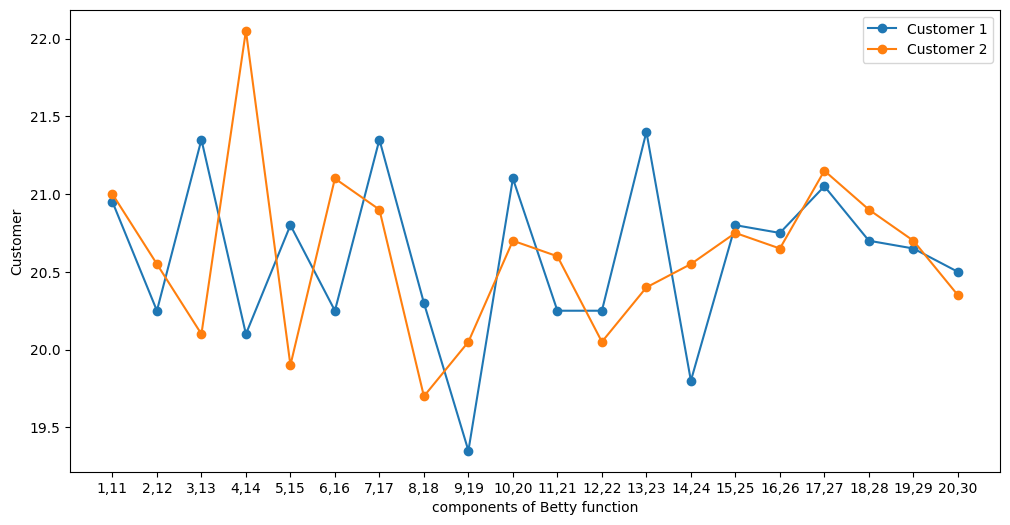

In [130]:
x = range(1, 21)
fig = plt.figure(figsize=(12, 6))
plt.plot(x, customer_1_SA, 'o-',label = 'Customer 1')
plt.plot(x, customer_2_SA, 'o-',label = 'Customer 2')
plt.xlabel('components of Betty function')
plt.ylabel('Customer')
plt.legend()
xtick_labels = ['{},{}'.format(a, a + 10) for a in x]
plt.xticks(x, xtick_labels)
plt.show()

## trend of Probability of waiting customer

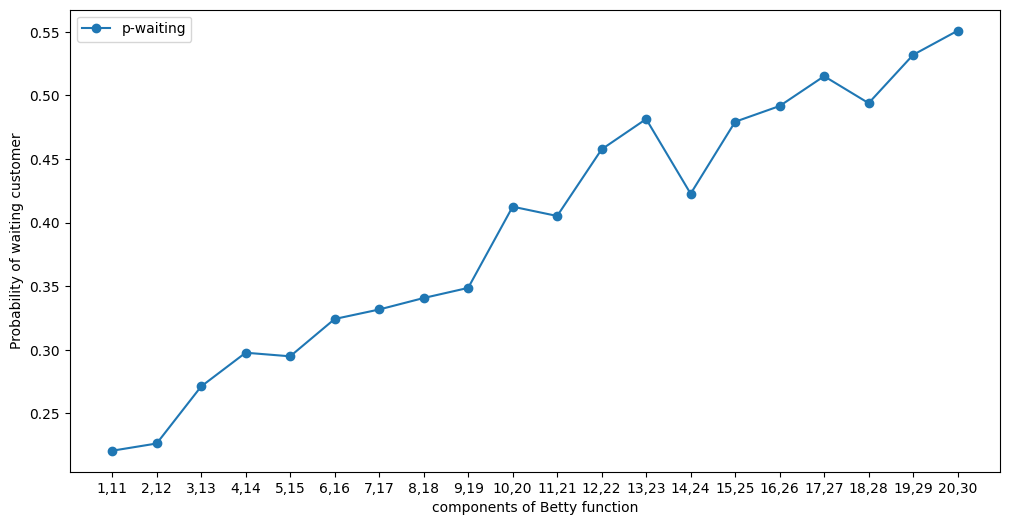

In [131]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, p_waiting_SA, 'o-',label = 'p-waiting')
plt.xlabel('components of Betty function')
plt.ylabel('Probability of waiting customer')
plt.legend()
xtick_labels = ['{},{}'.format(a, a + 10) for a in x]
plt.xticks(x, xtick_labels)
plt.show()

## Customer of Betty & David

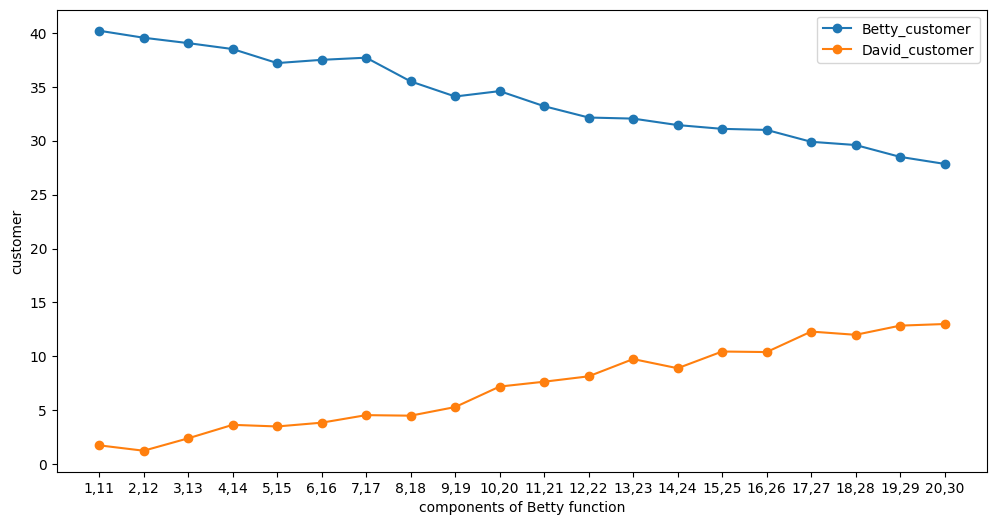

In [132]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, Betty_customer_SA, 'o-',label = 'Betty_customer')
plt.plot(x, David_customer_SA, 'o-',label = 'David_customer')
plt.xlabel('components of Betty function')
plt.ylabel('customer')
plt.legend()
xtick_labels = ['{},{}'.format(a, a + 10) for a in x]
plt.xticks(x, xtick_labels)
plt.show()

## average delay time trend

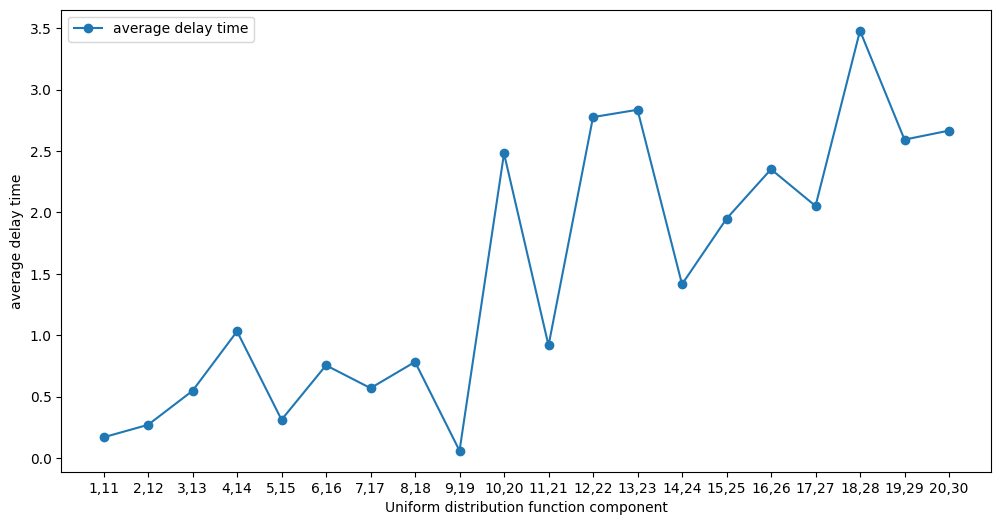

In [133]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, avg_delay_time_SA, 'o-',label = 'average delay time')
plt.xlabel('Uniform distribution function component')
plt.ylabel('average delay time')
plt.legend()
xtick_labels = ['{},{}'.format(a, a + 10) for a in x]
plt.xticks(x, xtick_labels)
plt.show()